In [16]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')


In [17]:
# Load data and finalize dataset variables
df = pd.read_csv('GlobalYearly.csv')

# Drop index column from csv
df = df.drop('Unnamed: 0',axis=1)

df

,Year,Population,Gas consumption,Coal consumption,Oil consumption,FossilFuelGrowth,CoalGrowth,GasGrowth,OilGrowth,AverageTemperature,AverageTemperatureUncertainty,TempMinus1,TempMinus2,TempMinus5,log_Gas,log_Coal,log_Oil,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Gas cumsum,Coal cumsum,Oil cumsum
0,1980,3.520742e+09,1.019004e+12,2.315429e+09,2.803656e+09,-937.510,568.843,15.456,-1521.806,15.964849,0.271722,NaN,NaN,NaN,27.649847,21.562861,21.754190,8.980333,0.106667,14.672917,0.152583,3.404667,0.150083,15.491833,0.053667,1.019004e+12,2.315429e+09,2.803656e+09
1,1981,3.583076e+09,1.007001e+12,2.364802e+09,2.693236e+09,-955.931,264.405,-49.198,-1171.134,16.058908,0.296235,15.964849,NaN,NaN,27.637998,21.583960,21.714009,9.165833,0.087250,14.855167,0.138917,3.635917,0.147417,15.516167,0.052333,2.026005e+12,4.680230e+09,5.496892e+09
2,1982,3.646517e+09,9.846384e+11,2.432822e+09,2.615005e+09,-979.571,185.496,-230.437,-934.624,15.986446,0.291190,16.058908,15.964849,NaN,27.615540,21.612318,21.684532,8.639167,0.082667,14.300917,0.171000,3.239917,0.207083,15.341917,0.054750,3.010644e+12,7.113053e+09,8.111897e+09
3,1983,3.710594e+09,9.717523e+11,2.541397e+09,2.584809e+09,311.553,551.937,-118.796,-121.585,16.111572,0.293034,15.986446,16.058908,NaN,27.602367,21.655980,21.672917,9.028167,0.094000,14.679833,0.114667,3.552417,0.124250,15.520250,0.055833,3.982396e+12,9.654450e+09,1.069671e+10
4,1984,3.777334e+09,1.057065e+12,2.702477e+09,2.648520e+09,2399.844,895.197,735.751,768.904,15.865528,0.284383,16.111572,15.986446,NaN,27.686517,21.717435,21.697267,8.691833,0.102583,14.342667,0.134083,3.186750,0.130333,15.344167,0.057167,5.039461e+12,1.235693e+10,1.334523e+10
5,1985,3.846210e+09,1.073513e+12,2.864156e+09,2.653958e+09,968.970,970.534,61.939,-63.502,15.837643,0.294676,15.865528,16.111572,15.964849,27.701958,21.775540,21.699318,8.658000,0.093250,14.267167,0.119667,3.175667,0.105417,15.340667,0.053917,6.112974e+12,1.522108e+10,1.599918e+10
6,1986,3.916121e+09,1.064809e+12,2.912023e+09,2.743547e+09,1157.716,276.564,-36.092,917.241,15.936502,0.276534,15.837643,15.865528,16.058908,27.693816,21.792114,21.732517,8.833583,0.085000,14.516833,0.120500,3.319333,0.128250,15.384000,0.053250,7.177783e+12,1.813311e+10,1.874273e+10
7,1987,3.988083e+09,1.117415e+12,3.057346e+09,2.816492e+09,2121.008,935.856,526.132,659.019,16.171337,0.262723,15.936502,15.837643,15.986446,27.742039,21.840813,21.758758,8.994417,0.085167,14.699833,0.110750,3.431417,0.144583,15.524500,0.053333,8.295198e+12,2.119045e+10,2.155922e+10
8,1988,4.060976e+09,1.166109e+12,3.183592e+09,2.927792e+09,2552.947,836.316,483.658,1232.973,16.276457,0.252774,16.171337,15.936502,16.111572,27.784693,21.881276,21.797515,9.201583,0.080083,14.890000,0.133667,3.654000,0.111500,15.555750,0.053250,9.461307e+12,2.437404e+10,2.448702e+10
9,1989,4.131563e+09,1.233739e+12,3.218606e+09,3.002605e+09,1736.035,440.454,607.512,688.065,16.317383,0.283368,16.276457,16.171337,15.865528,27.841071,21.892214,21.822746,8.922000,0.088000,14.621500,0.111833,3.334333,0.129167,15.441583,0.055917,1.069505e+13,2.759265e+10,2.748962e+10


<AxesSubplot:>

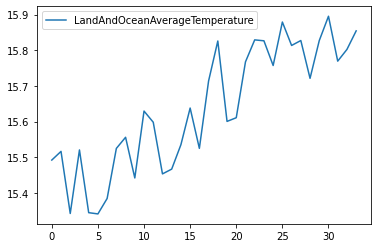

In [113]:
df[['LandAndOceanAverageTemperature']].plot()

In [97]:
def train_model(X,y,type="Ridge"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    if type == "LinearRegression":
        lm = LinearRegression().fit(X_train,y_train)
    elif type == "ElasticNetScaled":
        pipe = Pipeline([('scaler', StandardScaler()), ('EN', ElasticNet(alpha=0.1))])
        lm = pipe.fit(X_train, y_train)
    elif type == "ElasticNet":
        lm = ElasticNet(alpha=0.1).fit(X_train,y_train)
    elif type == "Ridge":
        lm = Ridge(alpha=0.1).fit(X_train,y_train)
        #lm = sm.OLS(y_train,X_train).fit_regularized(method="elastic_net",L1_wt=0)
        
    elif type == "Lasso":
        lm = Lasso(alpha=0.1).fit(X_train,y_train)
    elif type == "OMP":
        lm = OrthogonalMatchingPursuit().fit(X_train,y_train)
    #elif type == "GaussianProcess":   <- this didn't work, so maybe I am doing something wrong.
    #    kernel = DotProduct() + WhiteKernel()
    #    lm = GaussianProcessRegressor(kernel=kernel,random_state=0,alpha = 1e-5).fit(X, y)
    #    print("Gscore: ",lm.score(X, y))
    else:
        lm = LinearRegression().fit(X_train,y_train)
    print("Model Type: ",type)     
    print("r2 score: ",r2_score(lm.predict(X_test),y_test))
    print("mse: ",mean_squared_error(lm.predict(X_test),y_test))
    
    return lm, X_train, X_test, y_train, y_test
    

In [121]:
pca_data_columns =  ['Gas consumption','Coal consumption',
 'Oil consumption',
  'Gas cumsum', 
 'Coal cumsum',
 'Oil cumsum'] 

target_columns = ['LandAndOceanAverageTemperature']

pca_df = df[pca_data_columns+target_columns].dropna()


# create a base classifier used to evaluate a subset of attributes

# create the RFE model and select 3 attributes
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=11)
rfe = rfe.fit(pca_df[pca_data_columns], pca_df[target_columns])
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True]
[1 1 1 1 1 1]


In [126]:
data_columns = list(rfe.feature_names_in_[rfe.support_])

model_df = df[data_columns+target_columns].dropna()

y = model_df[target_columns]
X = model_df[data_columns]
for model in ['LinearRegression','Lasso','OMP','ElasticNet','Ridge']:
    lm, X_train, X_test, y_train, y_test = train_model(X,y,model)

Model Type:  LinearRegression
r2 score:  0.7952078647244554
mse:  0.005552573743353166
Model Type:  Lasso
r2 score:  0.800265361511647
mse:  0.0056336902797259015
Model Type:  OMP
r2 score:  0.742638264611682
mse:  0.005293570959122809
Model Type:  ElasticNet
r2 score:  0.8002653597907996
mse:  0.005633690353912205
Model Type:  Ridge
r2 score:  0.7952078647252802
mse:  0.005552573743351827


In [128]:
import pickle
with open("global_df.pkl","wb") as f:
    pickle.dump(df[['Year'] + pca_data_columns + target_columns].dropna(),f)
with open("global_ridge_model.pkl","wb") as f:
    pickle.dump(results,f)

In [116]:
model_df

,Gas consumption,Population,Coal consumption,Oil consumption,Gas cumsum,Coal cumsum,Oil cumsum,LandAndOceanAverageTemperature
0,1.019004e+12,3.520742e+09,2.315429e+09,2.803656e+09,1.019004e+12,2.315429e+09,2.803656e+09,15.491833
1,1.007001e+12,3.583076e+09,2.364802e+09,2.693236e+09,2.026005e+12,4.680230e+09,5.496892e+09,15.516167
2,9.846384e+11,3.646517e+09,2.432822e+09,2.615005e+09,3.010644e+12,7.113053e+09,8.111897e+09,15.341917
3,9.717523e+11,3.710594e+09,2.541397e+09,2.584809e+09,3.982396e+12,9.654450e+09,1.069671e+10,15.520250
4,1.057065e+12,3.777334e+09,2.702477e+09,2.648520e+09,5.039461e+12,1.235693e+10,1.334523e+10,15.344167
5,1.073513e+12,3.846210e+09,2.864156e+09,2.653958e+09,6.112974e+12,1.522108e+10,1.599918e+10,15.340667
6,1.064809e+12,3.916121e+09,2.912023e+09,2.743547e+09,7.177783e+12,1.813311e+10,1.874273e+10,15.384000
7,1.117415e+12,3.988083e+09,3.057346e+09,2.816492e+09,8.295198e+12,2.119045e+10,2.155922e+10,15.524500
8,1.166109e+12,4.060976e+09,3.183592e+09,2.927792e+09,9.461307e+12,2.437404e+10,2.448702e+10,15.555750
9,1.233739e+12,4.131563e+09,3.218606e+09,3.002605e+09,1.069505e+13,2.759265e+10,2.748962e+10,15.441583


In [130]:
lm.coef_

array([[-6.10264377e-13, -1.06945025e-10,  6.48448150e-10,
         6.56308349e-15,  9.05283059e-12, -7.09430078e-12]])

In [123]:
print("Model Scores: ")
print("r2 score: ",r2_score(lm.predict(X_test),y_test))
print("mse: ",mean_squared_error(lm.predict(X_test),y_test))
print()
#print("Simple Lag Model Scores: ")
#print("r2 score: ",r2_score(X_test['TempMinus1'],y_test))
#print("mse: ",mean_squared_error(X_test['TempMinus1'],y_test))

Model Scores: 
r2 score:  0.7952078647252802
mse:  0.005552573743351827



In [131]:
lm = sm.OLS(y_train,X_train)
results = lm.fit(alpha=0.1) #_regularized(method="elastic_net",L1_wt=0)

In [132]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     LandAndOceanAverageTemperature   R-squared:                      -3.364
Model:                                        OLS   Adj. R-squared:                 -4.728
Method:                             Least Squares   F-statistic:                    -2.467
Date:                            Sun, 08 May 2022   Prob (F-statistic):               1.00
Time:                                    20:52:12   Log-Likelihood:                -9.2058
No. Observations:                              22   AIC:                             30.41
Df Residuals:                                  16   BIC:                             36.96
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Gas consumption  -6.023e-12   7.59e-13     -7.936      0.000   -7.63e-12   -4.41e-12
Coal consumption  1.408e-09   4.67e-10      3.017      0.008    4.18e-10     2.4e-09
Oil consumption   7.245e-09   5.78e-10     12.526      0.000    6.02e-09    8.47e-09
Gas cumsum        2.167e-13   1.25e-13      1.739      0.101   -4.74e-14    4.81e-13
Coal cumsum      -2.581e-12   8.56e-11     -0.030      0.976   -1.84e-10    1.79e-10
Oil cumsum       -2.041e-10   6.78e-11     -3.012      0.008   -3.48e-10   -6.04e-11
==============================================================================
Omnibus:                        2.088   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.352   Jarque-Bera (JB):                1.049
Skew:                          -0.525   Prob(JB):                        0.592
Kurtosis:                       3.207   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""